# Homework 3 (Due 1/29 before class)

## Name:


## Q1. PY4E Chapter 5 Exercise 1

Write a program which repeatedly reads numbers until the
user enters "done". Once "done" is entered, print out the total, count,
and average of the numbers. If the user enters anything other than a
number, detect their mistake using try and except and print an error
message and skip to the next number. See sample run below.

```
Enter a number: 4
Enter a number: 5
Enter a number: bad data
Invalid input
Enter a number: 7
Enter a number: done
16 3 5.333333333333333
```

Write your code in the code cell below.

In [7]:
total=0
count=0
average=0
while True:
    userInput=input('Enter a number:')
    try:
        number=float(userInput)
        success=True
    except:
        success=False
    if success:
        total+=float(userInput)
        count+=1
        average=total/count
    elif userInput=='done':
        print(total,count,average)
        break
    else:
        print('Invalid input')
        continue

Enter a number:4
Enter a number:5
Enter a number:bad data
Invalid input
Enter a number:7
Enter a number:done
16.0 3 5.333333333333333


## Q2. BMI Calculator

Write a program which asks users to input their weight (in lbs) and height (in inches), and compute their body mass index (BMI), which is defind as $BMI=\frac{W}{H^2}$, where $W$ is their weight converted to kg, and $H$ is their height converted to m. (Assume 1 kg=2.205 lbs, and 1 m = 39.37 inches.) Finally, classify their BMI according to the following chart. 

|Classification | BMI ($kg/m^2$) |
|--|--|
|Underweight: | <18.5 |
|Normal: | 18.5 to 25 (>=18.5 but <25) |
|Overweight: | 25 to 30 (>=25 but <30) |
|Obese: | >=30 |

The program should ensure that the weight and height the user inputs are positive numbers. If the user does not input a number, then the program should print the message `"Invalid. Input must be a number."` If the user inputs a negative number or zero, the program should print the message `"Invalid. Input must be positive."` See sample run below.

```
Please input your weight (in lbs): thirty
Invalid. Input must be a number.
Please input your weight (in lbs): 143
Please input your height (in inches): 5'11''
Invalid. Input must be a number.
Please input your height (in inches): 71
According to the above chart, your BMI is 19.94 which is normal.
```

In [9]:
while True:
    userWeight=input('Please input your weight (in lbs):')
    try:
        weight=float(userWeight)
        if weight>0:
            success=True
            break
        else:
            print('Invalid. Input must be positive')
            continue
    except:
        print('Invalid. Input must be a number.')
        success=False
        continue
while True:
    userHeight=input('Please input your height (in inches):')
    try:
        height=float(userHeight)
        if height>0:
            success=True
            break
        else:
            print('Invalid. Input must be positive')
            continue
    except:
        print('Invalid. Input must be a number.')
        success=False
        continue
if success:
    height_meter=height/39.37
    weight_kg=weight/2.205
    BMI=weight_kg/height_meter**2
    if BMI<18.5:
        classification='underweight'
    elif BMI<25:
        classification='normal' 
    elif BMI<30:
        classification='overweight'
    else:
        classification='obese'
    print('According to the above chart, your BMI is',round(BMI,2),'which is',classification,'.')

Please input your weight (in lbs):-10
Invalid. Input must be positive
Please input your weight (in lbs):th
Invalid. Input must be a number.
Please input your weight (in lbs):143
Please input your height (in inches):-7
Invalid. Input must be positive
Please input your height (in inches):71
According to the above chart, your BMI is 19.94 which is normal .


## Q3: Batch Automation of Payroll Computations
Write a function `calculateAllWages` which takes three input arguments:

- `filename`: the name of a CSV file in which the first column is the name of each employee and the second column is the hours worked that week by the employee. (See the attached file `"hours_worked.csv"` for a sample.)
- `base` (default 10.0): the base hourly rate for hours below 40.
- `bonus` (default 0.5): each hour above 40 obtains a pay of `base*(1+bonus)`.

and print to screen the pay for each employee. At the end, the function should print the total and average pay. You may assume that the input file is properly formatted. See the sample output below (this assumes that the attached `hours_worked.csv` is saved in the current directory.)

In [3]:
# Sample output

Alice worked 40.0 hours. Pay: 400.0
Bob worked 76.5 hours. Pay: 947.5
Charlie worked 66.5 hours. Pay: 797.5
Derek worked 47.0 hours. Pay: 505.0
Emma worked 21.5 hours. Pay: 215.0
Frank worked 40.0 hours. Pay: 400.0
Gatsby worked 40.0 hours. Pay: 400.0
Hanna worked 16.0 hours. Pay: 160.0
Irvin worked 16.0 hours. Pay: 160.0
Jack worked 40.0 hours. Pay: 400.0
Total pay is 4385.0
Average pay is 438.5


In [78]:
import pandas as pd

# define a founction to calculate one person's wage
def calculateWage(hours,base,bonus):
    if hours<=40:
        pay=hours*base
    else:
        pay=40*base+(1+bonus)*(hours-40)*base
    return pay

# define a founction to read file, calculate on column wage and do sum and average
def calculateAllWages(filename,base=10,bonus=0.5):
    file=pd.read_csv(filename,header=None,index_col=False)
    n=len(file)
    total=0
    average=0
    for i in range(n):
        hours=file.loc[i,1]
        name=file.loc[i,0]
        pay=calculateWage(hours,base,bonus)
        total+=pay
        print(name,'worked',hours,'hours. Pay:',pay )
    average=total/n
    print('Total pay is',total)
    print('Average pay is',average)
    
calculateAllWages('hours_worked.csv')

Alice worked 40.0 hours. Pay: 400.0
Bob worked 76.5 hours. Pay: 947.5
Charlie worked 66.5 hours. Pay: 797.5
Derek worked 47.0 hours. Pay: 505.0
Emma worked 21.5 hours. Pay: 215.0
Frank worked 40.0 hours. Pay: 400.0
Gatsby worked 40.0 hours. Pay: 400.0
Hanna worked 16.0 hours. Pay: 160.0
Irvin worked 16.0 hours. Pay: 160.0
Jack worked 40.0 hours. Pay: 400.0
Total pay is 4385.0
Average pay is 438.5


## Q4. Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over (which can be a `range` instead of a `list`).
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

The function should iterate through the possible stocking levels in `levelList`, and print one line giving the average inventory cost for that stocking level. For a given stocking level, the average inventory cost is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. 

For example, if the stocking level is 10, and the demand scenarios are `[6,12,14]`, and the parameters `underage=9`, `overrage=5`. Then the inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the inventory level is 4 units too high. (The overage cost of 5/unit is applied when inventory is too high). The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the inventory level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the inventory level is 4 units too low. The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects. The first object is the stocking level that achieves the minimal average inventory cost (if there is a tie, return the smallest stocking level yielding the minimal cost). The second object is a dictionary mapping each inventory level to the average inventory cost for that stocking level. 

The following code illustrates the use of the function (after you complete the function). (Hint: it may be easiest to write another function which calculates the average inventory cost given a particular stocking level, so that `optBaseStock` can simply call this other function to compute the average inventory cost for each stocking level.)

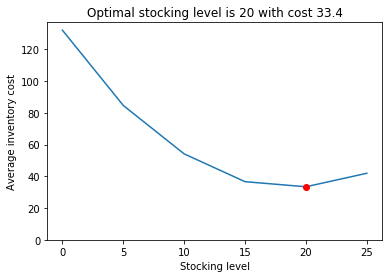

In [104]:
# Write your function in this cell
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
def calculateAvg(level,demandList,underage,overage):
    total=0
    n=len(demandList)
    for demand in demandList:
        if demand==level:
            c=0
        elif demand>level:
            c=(demand-level)*underage
            total+=c
        else:
            c=(level-demand)*overage
            total+=c
    return round(total/n,2)

def optBaseStock(levelList,demandList,underage,overage):
    average_min=100
    bestlevel=0
    cost={}
    for item in levelList:
        cost[item]=calculateAvg(item,demandList,underage,overage)
        average=calculateAvg(item,demandList,underage,overage)
        if average<average_min:
            bestlevel=item
            average_min=average
        elif average==average_min and item<bestlevel:
            bestlevel=item
    return bestlevel,cost

bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title('Optimal stocking level is '+str(bestLevel)+' with cost '+str(round(cost[bestLevel],2)))
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

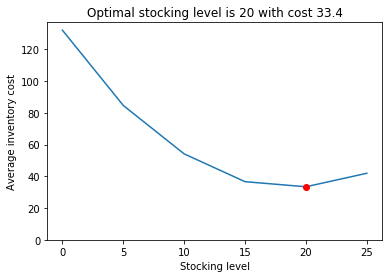

In [10]:
#sample
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title('Optimal stocking level is '+str(bestLevel)+' with cost '+str(round(cost[bestLevel],2)))
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()